In [1]:
import os
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
os.chdir(path)
path

'C:\\Users\\user\\Desktop\\Anuranan\\KFSC-Python'

In [2]:
!pip install soyclustering

In [3]:
import time
from multiprocessing import Pool
import multiprocessing
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score
from BestMap import BestMap
from KFSC import KFSC
from KFSC_LARGE import KFSC_LARGE
from KFSC_minibatch import KFSC_MB
from multi_tester import test_dataset

In [4]:
# dataset = 'mnist_sc_f150.mat'
# dataset = 'fmnist_fea_150.mat'
# dataset = 'covtype.mat'
dataset = 'PokerHand2.mat'
# dataset = 'Postures_m.mat'
# dataset = 'Epileptic.mat'
f = sio.loadmat(dataset)
X = f['X']
X = np.nan_to_num(X)
label = np.concatenate(f['Label'])
k = len(np.unique(label))
cpu_count = multiprocessing.cpu_count()
use_cpu = 23
print("CPU count: ", cpu_count)
print("Using CPU: ", use_cpu)

CPU count:  48
Using CPU:  23


In [5]:
iterations = 23
funct_to_run = KFSC_MB
params = {}
params["opt"] = {
    'solver': 2,
    'maxiter': 300,
    'tol': 1e-4,
    'init_type': 'k-means-cos',
    'nrep_kmeans': 1,
    'classifier': 're'
}
# params["opt"]['batch_size'] = 5*np.logspace(1, 3, iterations, dtype=int)
params["opt"]['np'] = 10*np.ones((iterations), dtype=int)

In [6]:
# params["opt"]['batch_size']

# params["opt"]['np']

In [7]:
# [] + [X, k, label, funct_to_run, dataset]

In [8]:
arg_list = []
for i in range(iterations):
    arg_list.append([])
    arg_list[-1] += [X, k, label, funct_to_run, dataset]
    print(arg_list[-1])
    build_dict = {'lamda':0.1}
#     for key in params.keys():
#         build_dict[key] = params[key][i]
    build_dict['opt'] = {}
    for key in params['opt'].keys():
        if key == 'np':         
            build_dict['opt'][key] = params['opt'][key][i]
        else:
            build_dict['opt'][key] = params['opt'][key]
            
    arg_list[-1].append(build_dict)
    arg_list[-1] = tuple(arg_list[-1])
arg_list[20]

[array([[ 1,  3,  1, ...,  1,  3,  2],
       [ 1, 12,  9, ..., 11, 11,  5],
       [ 1,  3,  4, ...,  4,  1,  2],
       ...,
       [ 3,  5,  2, ..., 13, 13,  3],
       [ 1,  2,  3, ...,  2,  2,  3],
       [12,  5,  9, ...,  7,  8,  3]], dtype=uint8), 10, array([0, 1, 1, ..., 1, 1, 2], dtype=uint8), <function KFSC_MB at 0x000001C53CC851F0>, 'PokerHand2.mat']
[array([[ 1,  3,  1, ...,  1,  3,  2],
       [ 1, 12,  9, ..., 11, 11,  5],
       [ 1,  3,  4, ...,  4,  1,  2],
       ...,
       [ 3,  5,  2, ..., 13, 13,  3],
       [ 1,  2,  3, ...,  2,  2,  3],
       [12,  5,  9, ...,  7,  8,  3]], dtype=uint8), 10, array([0, 1, 1, ..., 1, 1, 2], dtype=uint8), <function KFSC_MB at 0x000001C53CC851F0>, 'PokerHand2.mat']
[array([[ 1,  3,  1, ...,  1,  3,  2],
       [ 1, 12,  9, ..., 11, 11,  5],
       [ 1,  3,  4, ...,  4,  1,  2],
       ...,
       [ 3,  5,  2, ..., 13, 13,  3],
       [ 1,  2,  3, ...,  2,  2,  3],
       [12,  5,  9, ...,  7,  8,  3]], dtype=uint8), 10, array([0, 

(array([[ 1,  3,  1, ...,  1,  3,  2],
        [ 1, 12,  9, ..., 11, 11,  5],
        [ 1,  3,  4, ...,  4,  1,  2],
        ...,
        [ 3,  5,  2, ..., 13, 13,  3],
        [ 1,  2,  3, ...,  2,  2,  3],
        [12,  5,  9, ...,  7,  8,  3]], dtype=uint8),
 10,
 array([0, 1, 1, ..., 1, 1, 2], dtype=uint8),
 <function KFSC_minibatch.KFSC_MB(X, k, d, lamda, options: Optional[dict] = None)>,
 'PokerHand2.mat',
 {'lamda': 0.1,
  'opt': {'solver': 2,
   'maxiter': 300,
   'tol': 0.0001,
   'init_type': 'k-means-cos',
   'nrep_kmeans': 1,
   'classifier': 're',
   'np': 10}})

In [9]:
with Pool(processes=use_cpu) as p:
    df_list = p.starmap(test_dataset, arg_list)
combined_df = pd.concat(df_list, ignore_index=True)
path = os.getcwd()
os.chdir(path+'//Scores')
combined_df.to_csv(dataset.split('_')[0] + 'bulk_run_info.csv', mode='a', 
                   index=False, header=False)

In [10]:
combined_df

,Dataset,acc,nmi,time,d,lamda,opt,Function,parameters
0,PokerHand2.mat,0.491778,8.300501e-06,9310.442984,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
1,PokerHand2.mat,0.500879,1.204703e-04,9355.677105,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
2,PokerHand2.mat,0.501206,6.354312e-06,9279.451019,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
3,PokerHand2.mat,0.501207,1.393762e-06,9278.750107,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
4,PokerHand2.mat,0.501209,0.000000e+00,9358.924801,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
5,PokerHand2.mat,0.501215,6.658577e-06,9283.593765,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
6,PokerHand2.mat,0.499980,3.562929e-05,9342.195597,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
7,PokerHand2.mat,0.501209,0.000000e+00,9318.460658,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
8,PokerHand2.mat,0.501209,0.000000e+00,9359.844748,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."
9,PokerHand2.mat,0.501209,3.380666e-07,9273.708318,30,0.1,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'lamda': 0.1, 'opt': {'solver': 2, 'maxiter':..."


In [11]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.titlesize':'xx-large'}
pylab.rcParams.update(params)

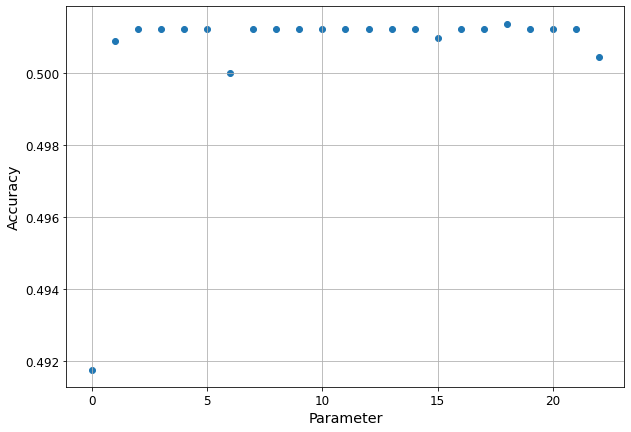

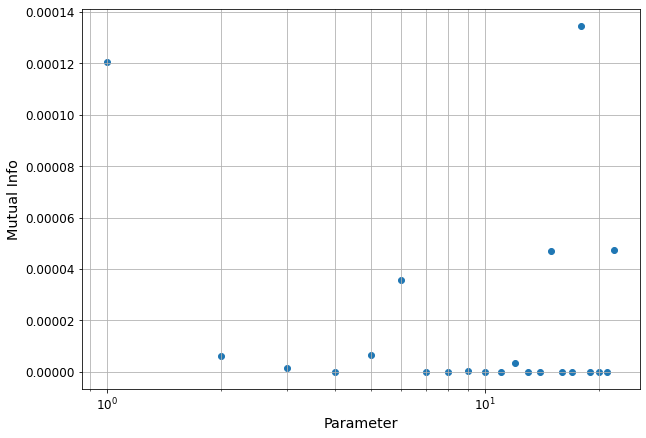

In [12]:
# xvals = [combined_df['parameters'][i]['nsel'] for 
#          i in range(len(list(combined_df['parameters'])))]
# xvals = [combined_df['parameters'][i]['opt']['batch_size'] for 
#          i in range(len(list(combined_df['parameters'])))]
xvals = np.arange(combined_df.shape[0])
plt.scatter(xvals, combined_df['acc'])
plt.ylabel("Accuracy"); plt.xlabel("Parameter")
# plt.xscale('log')
plt.grid(which='both')
plt.show()

plt.scatter(xvals, combined_df['nmi'])
plt.ylabel("Mutual Info"); plt.xlabel("Parameter")
plt.xscale('log')
plt.grid(which='both')
plt.show()